<a href="https://colab.research.google.com/github/antoniomlo/Data_Science/blob/main/Analisando_os_Dados_do_Airbnb_Lisboa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2><b>Projeto Airbnb</b><h2>

*by [Antonio Melo](https://www.linkedin.com/in/antoniomlo/)*

# **Análise dos Dados do Airbnb - Lisboa**

<img alt="Analisando Airbnb" width="10%" src="https://marcas-logos.net/wp-content/uploads/2020/03/Airbnb-logo.jpg">

  O [Airbnb](https://www.airbnb.com.br/) já é considerado como a **maior empresa hoteleira da atualidade** mesmo sem possuir **nenhum hotel**.

  O Airbnb possui uma plataforma inovadora no quesito hospedagem, deixando a opção  quem quer viajar de se hospedar em casas inteiras ou até mesmo quartos compartilhados, tornando a interação entre hóspede e anfitrião bem mais flexível. 

   A Startup fundada 14 anos atrás, em outubro de 2021 já contava com **mais de 1 Bilhão** de pessoas hospedadas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

  Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.
<center><img alt="Analisando Airbnb" width="80%" src="https://www.revistalounge.com.br/wp-content/uploads/Belem-Tower-At-Night-Lisbon-Portugal-Wallpaper.jpg"></center>

**Neste *notebook*, irei analisar os dados referentes à cidade de Lisboa, e ver quais insights podem ser extraídos a partir de dados brutos.**

## **Obtenção dos Dados**


Para começar, irei importar as bibliotecas necessarias para a analise dos dados/gráficos e colocar as devidas especificações das fontes.

In [226]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [227]:
# Importando o arquivo csv que iremos colocar no DataFrame
df = pd.read_csv('http://data.insideairbnb.com/portugal/lisbon/lisbon/2021-10-15/visualisations/listings.csv')

## **Análise dos Dados**


**Dicionário das variáveis**

* `id` - Número de ID do imovel
* `name` - Nome da propriedade anunciada
* `host_id` - Número de ID do proprietario
* `host_name` - Nome do proprietario
* `neighbourhood_group` - Coluna ausente de valor válido
* `neighbourhood` - Nome do Distrito
* `latitude	` - Coordenada da latitude da propriedade
* `longitude` - Coordenada da latitude da propriedade
* `room_type` - Tipo de quarto 
* `price` - Preço do aluguel 
* `minimum_nights` - Minimo de Noites para reserva
* `number_of_reviews` - Numero de feedbacks da propriedade
* `last_review` - Data do ultimo feedback 
* `reviews_per_month` - Número de feedback por mês
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo proprietario
* `availability_365` - Número de dias de disponibilidade dentro de 365 dias


Antes de iniciar qualquer análise, irei verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [228]:
# Obtendo as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,40,3,30,2021-09-18,0.35,1,161,4,NaN
1,25659,Heart of Alfama Lisbon Center - Cœur de l'Alfama,107347,Ellie,Lisboa,Santa Maria Maior,38.71241,-9.12706,Entire home/apt,45,2,122,2019-11-08,1.35,1,296,9,56539/AL.
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71082,-9.12719,Entire home/apt,54,3,333,2019-10-29,2.73,1,170,10,23535/AL
3,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.71156,-9.12987,Entire home/apt,51,2,290,2021-10-01,2.81,1,299,34,28737/AL
4,29720,TheHOUSE - Your luxury home,128075,Francisco,Lisboa,Estrela,38.71108,-9.15979,Entire home/apt,1114,2,59,2021-09-04,0.86,1,323,4,55695/AL


### **Quantos atributos (variáveis) e quantas entradas o conjunto de dados possui? Quais os tipos das variáveis?**

In [229]:
# Identificando o volume de dados do DataFrame
print(df.shape)

# Verificando os tipos de variáveis presentes
df.dtypes

(18761, 18)


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

Após essa análise, podemos ver que esse Dataframe possui 18761 linhas e 18 colunas. Além disso, as váriaveis estão classificadas da seguinte maneira: int, que são os valores inteiros, float, que são os valores decimais, e object, que são as palavras.

### **Qual a porcentagem de valores ausentes no *dataset*?**
Os valores ausentes dizem muito sobre a qualidade do dataset. Visando apresentar um dataset de qualidade, irei verificar se tem valores ausentes e decidir a partir desses se devo retirá-los ou não.

In [230]:
# Ordenando em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False) * 100

reviews_per_month                 14.647407
last_review                       14.647407
license                            9.903523
host_name                          0.090614
name                               0.042642
longitude                          0.000000
host_id                            0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
room_type                          0.000000
number_of_reviews_ltm              0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
id                                 0.000000
dtype: float64

Após a leitura, é possível perceber que aproximadamente 15% dos valores de `reviews_per_month ` e `last_review` estão ausentes e aproximadamente 10% de `license` também estão ausentes. Tendo em vista que nenhum deles possui informações tão relevantes para a análise essa análise, iremos excluir suas colunas.

Em relação as outras entradas ausentes, como representam menos de 0,1% iremos excluir suas linhas.

In [231]:
df = df.drop(columns=['license','reviews_per_month','last_review'])
df = df.dropna(axis=0)

Agora irei checar se a exclusão está de acordo com o esperado.


In [232]:
print(df.shape)
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False) * 100

(18736, 15)


number_of_reviews_ltm             0.0
availability_365                  0.0
calculated_host_listings_count    0.0
number_of_reviews                 0.0
minimum_nights                    0.0
price                             0.0
room_type                         0.0
longitude                         0.0
latitude                          0.0
neighbourhood                     0.0
neighbourhood_group               0.0
host_name                         0.0
host_id                           0.0
name                              0.0
id                                0.0
dtype: float64

Após esse processo, o novo dataframe está com 18736 linhas e 15 colunas e sem nenhum valor ausente. Agora podemos dar continuidade a análise e observar a quantidade de *outliers* que o dataframe possui.

### **Qual o tipo de distribuição das variáveis?** 

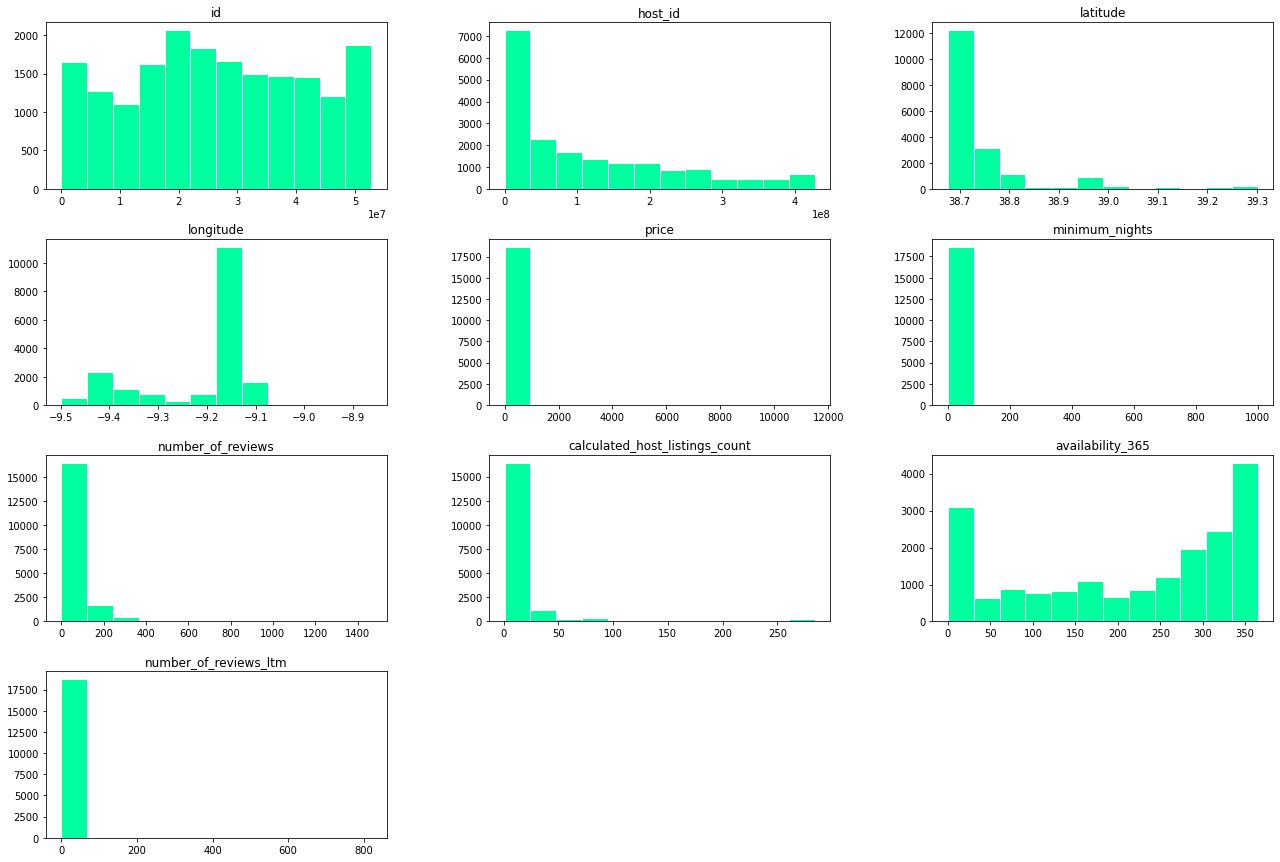

In [233]:
# Plotando o histograma das variáveis numéricas
df.hist(bins=12, figsize=(22,15), grid=False, color= '#00ff9f',ec = "w");


Após analisar os histogramas, é notável que `minimum_nights` e `price` estão com valores suspeitos, tendo em vista que possuem como valores maximos 1000 noites mínimas para aluguel e 11499 euros por díaria. 

Logo, vamos analisar esses duas colunas mais afundo.

## **Há Outliers presentes?**

Para analisar se existem outliers iremos usar dois métodos:

* Resumo estatístico com o `describe()`
* Plotar `boxplots` para a variável.


In [234]:
print(df[['minimum_nights', 'price']].describe().round(2))

       minimum_nights     price
count        18736.00  18736.00
mean             4.08    104.57
std             18.05    199.76
min              1.00      0.00
25%              2.00     50.00
50%              2.00     74.00
75%              3.00    110.00
max           1000.00  11499.00


Com a obtenção desses dados, podemos analisar mais profundamente se há outliers. Na variável `minimum_nights` por exemplo, podemos observar que a mediana (`std`), a média (`mean`) e com 75% de seus valores estando abaixo de 3 noite, estão coerentes. Contudo, ao analizar o valor máximo(`max`), é perceptível que é um valor totalmente fora da curva, considerado um outlier. 

Na coluna `price ocorre a mesma situação porem de forma mais agressiva. É possível notar que a diferença entre 75% dos valores e o valor máximo é enorme, deixando a entender que é mais um caso de outlier. Para melhor visualização desses outliers, irei plotar o boxplot de ambos a seguir.

### **Boxplot da variável** `minimun_nights`

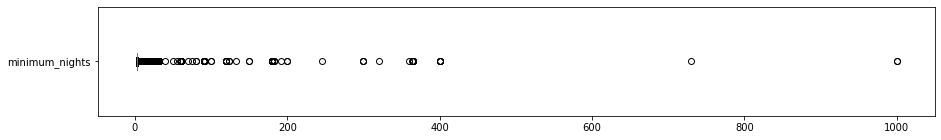

Acima de 30 noites: 
125 entradas
0.67%


In [235]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,2))
plt.show()

# Buscando entradas acima de 30 noites
print('Acima de 30 noites: ')
print('{} entradas'.format(len(df[df.minimum_nights > 30])))
print("{:.2f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

Com os dados acima, note que existem alguns valores bem incopatíveis com o "normal". Por exemplo o valor máximo que é de 1000 noites.

### **Boxplot da variável** `price`


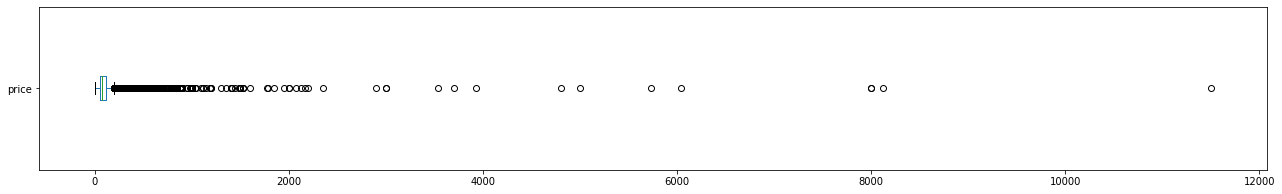

Acima de €250:
908 entradas
4.85%


In [244]:
df.price.plot(kind='box', vert=False, figsize=(22,3))
plt.show()

# Buscando valores acima de 250 euros
print('Acima de €250:')
print('{} entradas'.format(len(df[df.price > 250])))
print('{:.2f}%'.format((len(df[df.price > 250])/df.shape[0])*100))

Com os dados acima, note que temos alguns valores bem incopatíveis com o "normal". Por exemplo o valor máximo que é de **€11499**, que seria algo por volta de **R$74000**, na cotação do dia 30/11/2021.

Após a verificação dos outliers do nosso dataframe, iremos trabalhar na exclusão ou tratamento desses valores discrepantes. Apesar dos valores acima de **30 noites** serem baixos, irei exclui-los mesmo assim, juntamente com os valores acima de **€250** por noite, para que o nosso dataframe siga um bom padrão qualitativo. 

### **Excluindo os outliers**


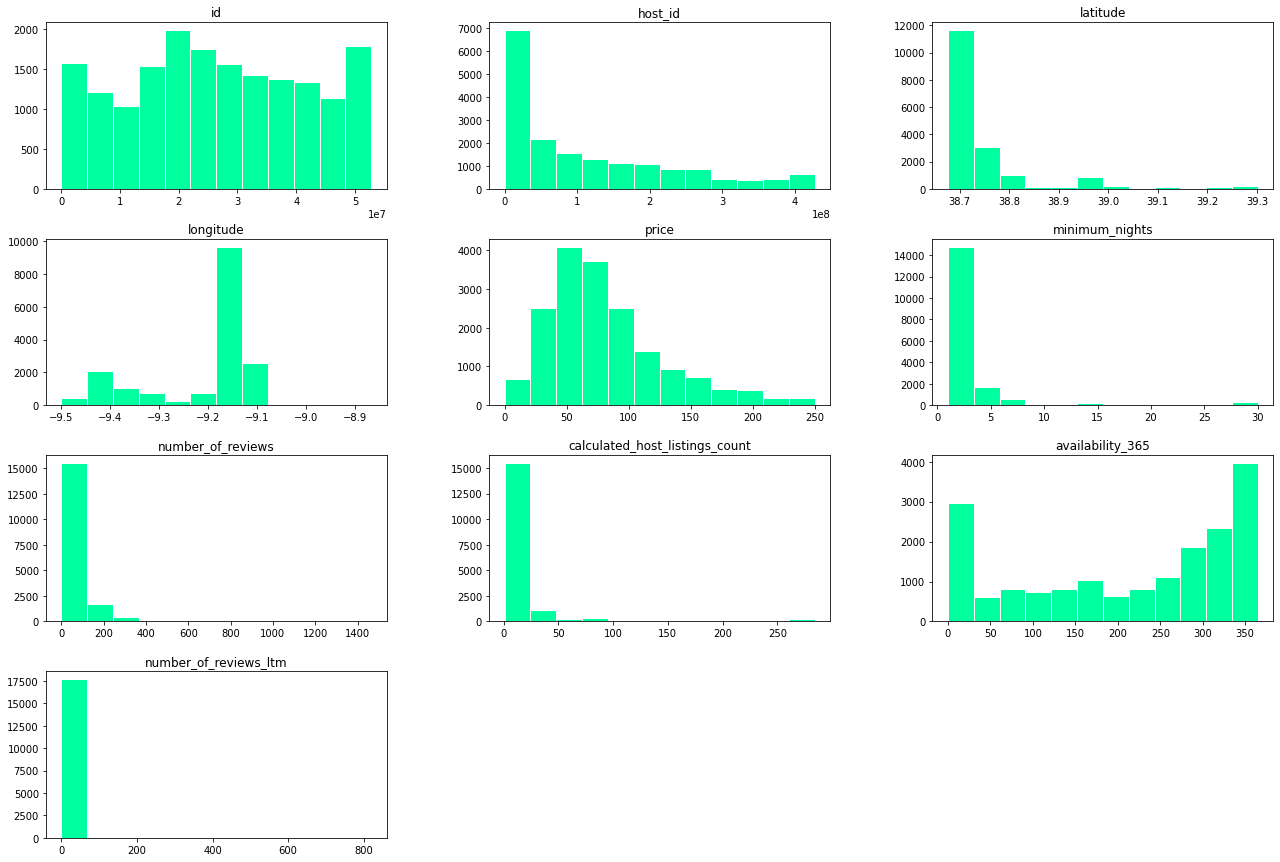

In [242]:
# Definindo o novo dataset sem outliers
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 250].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# Plotando o gráfico
df_clean.hist(bins=12, figsize=(22,15), grid=False, color= '#00ff9f',ec = "w");

Agora que temos os dados mais limpos, conseguimos extrair as informações mais valiosas facilmente. Nesse novo histograma, é possível notar que a maior quantidade de imóveis em Lisboa estão entre 25 e 100 euros. 

## **Média de preços e de noites hospedadas**

A seguir vamos obter a média de preços e a de noites que os usuários costumam ficar hospedados na capital.

In [200]:
# Mostrando a média de preços e de noites 
print('Média de preço em Lisboa: €{:.2f}'.format(df_clean['price'].mean()))
print('Média de noites hospedadas: {:.0f} noites'.format(df_clean['minimum_nights'].mean()))


Média de preço em Lisboa: €81.44
Média de noites hospedadas: 3 noites


## **Qual o tipo de imóvel mais alugado no Airbnb**

Nessa análise, iremos ver qual o tipo de imóvel mais alugado em Lisboa. Para isso, iremos analisar a variável `room_type`e mostrar abaixo essa classificação.

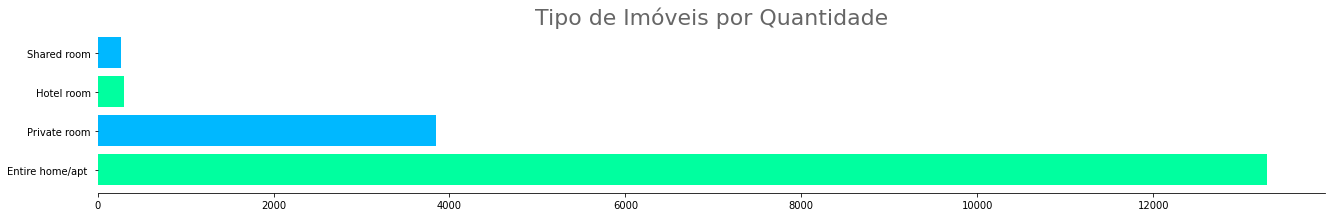

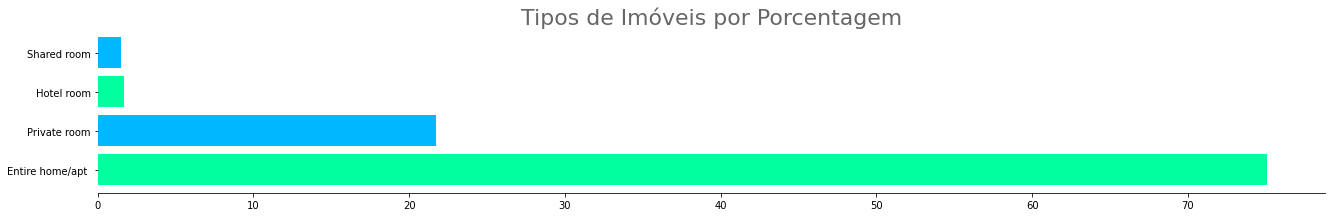

In [199]:
# Deinindo as variáveis 
  x = df_clean.room_type.value_counts(ascending=False)
  s = df_clean.room_type.value_counts(ascending=False)/df_clean.shape[0] * 100 

# Definindo as cores
  mylabels = ["Entire home/apt ", "Private room", "Hotel room", "Shared room"]
  mycolors = ["#00ff9f","#00b8ff"]
  tit = "#666"

# Plotando o gráfico 1 e o seu título
  fig, ax = plt.subplots(figsize=(22, 3))
  plt.title('Tipo de Imóveis por Quantidade', fontsize= 22, fontweight= 500, color = tit)

# Especificações do gráfico
  ax.barh(mylabels, x , color = mycolors, height=0.8, tick_label= mylabels)

# Removendo grid
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['left'].set_visible(False)

# Plotando o gráfico 2 e o seu título
  fig, ax = plt.subplots(figsize=(22, 3))
  plt.title('Tipos de Imóveis por Porcentagem', fontsize= 22, fontweight= 500, color = tit)

# Especificações do gráfico
  ax.barh(mylabels, s , color = mycolors, height=0.8, tick_label= mylabels)

# Removendo grid
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['left'].set_visible(False)

  plt.show;

<h1><b>Legenda<h1>

**Entire home/apt - Casa inteiro/Apartamento - 75,1%**

**Private room - Quarto Privado - 21,7%**

**Shared room -  Quarto Compartilhado - 1,7%**
 
**Hotel room - Quarto de Hotel - 1,5%**

## **Quantas regiões existem no dataset ?**

In [ ]:
# Obtendo os dados das localidades
df_clean.neighbourhood.value_counts().shape

(123,)

O distrito de Lisboa possui 123 regiões. Abaixo irei fazer uma análise para ver as 10 localidades mais caras e as 10 mais baratas.

### **Quais as regiões mais caras do dataset ?**



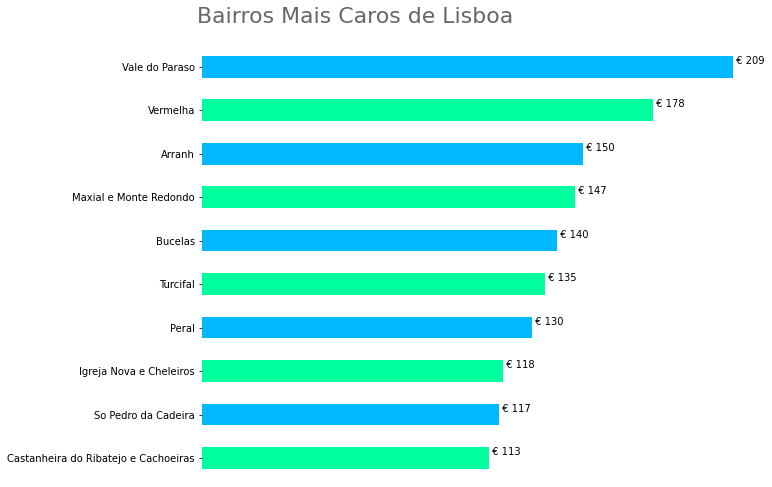

In [ ]:
#Definindo cores
tit = "#666"
mycolors = ["#00ff9f","#00b8ff"]

# Plotando o gráfico e o seu título
fig, ax = plt.subplots(figsize=(10, 8))

with palette:
# Vendo preços por bairros, na média
  ax = df_clean.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=True)[113:].plot.barh(color = mycolors)

# Plotando o título
  plt.text(-2, 10, 'Bairros Mais Caros de Lisboa', fontsize=22, color=tit, weight=500)

  initialx=0

# Removendo o grid
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)

# Removendo os titulos
  ax.set_ylabel('')    
  ax.set_xlabel('')

  plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=False) 
    
# Adicionando labels
  for p in ax.patches:
    ax.text(p.get_width(),initialx+p.get_height()/8,' € {:1.0f}'.format(p.get_width()))
    initialx+=1
  plt.show()

### **Quais os bairros mais baratos do dataset ?**



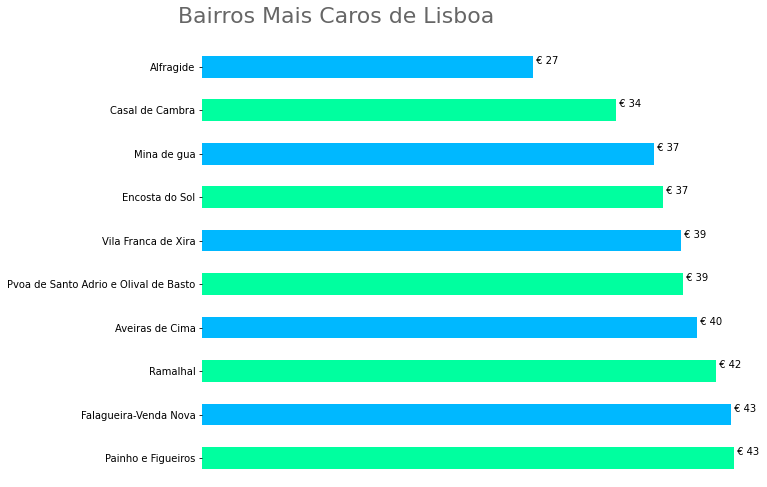

In [243]:
#Definindo cores
tit = "#666"
mycolors = ["#00ff9f","#00b8ff"]

# Plotando o gráfico e o seu título
fig, ax = plt.subplots(figsize=(10, 8))

with palette:
# Vendo preços por bairros, na média
  ax = df_clean.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)[113:].plot.barh(color = mycolors)

# Plotando o título
  plt.text(-2, 10, 'Bairros Mais Caros de Lisboa', fontsize=22, color=tit, weight=500)

  initialx=0

# Removendo o grid
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)

# Removendo os titulos
  ax.set_ylabel('')    
  ax.set_xlabel('')

  plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=False) 
    
# Adicionando labels
  for p in ax.patches:
    ax.text(p.get_width(),initialx+p.get_height()/8,' € {:1.0f}'.format(p.get_width()))
    initialx+=1
  plt.show()

## **Por que a região do Vale do Paraíso tem a maior média de preços?**



<center><img alt="Analisando Airbnb" width="80%" src="https://image.freepik.com/fotos-gratis/ponte-de-madeira-em-um-campo-com-um-lago-durante-o-por-do-sol-em-portugal_181624-10560.jpg"></center>



Para fazer essa análise, irei ver a quantidade de imóveis que a região possui.

In [ ]:
# Métricas da região
print(df_clean[df_clean.neighbourhood == "Vale do Paraso"].shape)
df_clean[df_clean.neighbourhood == "Vale do Paraso"].price

(1, 15)


10642    209
Name: price, dtype: int64

A partir dessa simples análise já é possível ver o porque dessa região ser a mais cara... Possui apenas **1** imóvel que custa **€209** por noite. Logo, a média também seria **€209**.

<h3>Para finalizar essa análise, irei plotar um heatmap dos imóveis em suas respectivas localidades em relação aos seus preços.<h3>

## **Grafico baseado na latitude e longitude em relaçao ao preço**

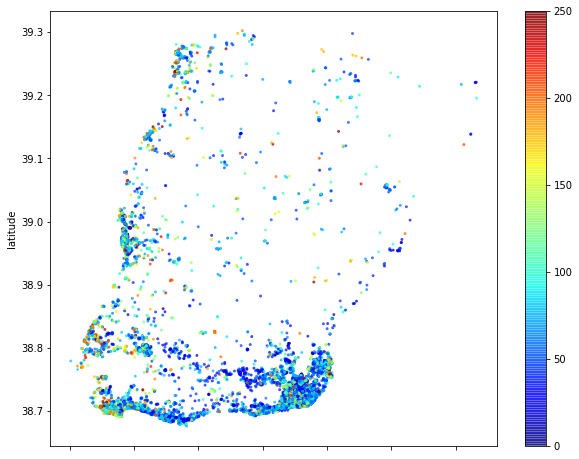

In [ ]:
# Plotando os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.6, c=df_clean['price'], s=4,
              cmap=plt.get_cmap('jet'), figsize=(10,8));

Apos a leitura desses dados, é possível observar que a maior quantidade de imóveis se localiza na região da capital (***Lisboa***, na parte inferior do centro) e tem seus preços, em sua maioria, nas faixas azúis. Logo, vemos que é possível se hospedar na capital por menos de **€100** e ficar no centro da maioria dos pontos turísticos mostrados na foto abaixo.


<center><img alt="Analisando Airbnb" width="50%" src="https://s7a5n8m2.stackpathcdn.com/wp-content/uploads/2015/07/mapa.gif"></center>



# **Conclusões**
Após análise feita acima, é possível visualizar diversos parâmetros do Airbnb do distrito de Lisboa, como por exemplos as localidades mais caras  para passsar a noite, a média de preços das regiões, um mapa de calor mostrando onde se encontram os imóveis e seus respectivos preços e muito mais.

Vale ressaltar que essa análise foi feita de forma superficial, contando apenas com os principais parâmetros, tornando-a mais resumida, tendo como objetivo principal a visualização de dados a partir de um arquivo csv.

